Besides relevence, we want to use the number of peer factors to maximize findings of eGenes (a gene with at leat one eQTL)\
Check the output in nominal run to decide how many peer factors are needed for permutation run

Filter the p values in nominal runs by 1e-8. Reference:
* Marrella, M.A., Biase, F.H. Robust identification of regulatory variants (eQTLs) using a differential expression framework developed for RNA-sequencing. J Animal Sci Biotechnol 14, 62 (2023). https://doi.org/10.1186/s40104-023-00861-0
```
We inferred a significant eQTL when the nominal P-value was less than 5 × 10–8, which is a threshold commonly applied to genome-wide association studies
```

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import tqdm

# 1. Old method
Do 60 PEER on all samples, then pick the eQTL samples and desired number of peers

In [25]:
# Path to results of nominal runs
pval_threshold = 1e-8
path = '/data100t1/home/wanying/CCHC/eQTL_gtex_pipeline/output/nominal_runs'
dict_total_eGenes = dict() # Track number of peer factors vs eGenes
num_peers = [x for x in range(10, 61, 5)]
for num_peer in tqdm.tqdm(num_peers):
    total_eGenes = 0
    folder = f'nominal_{num_peer}_peer'
    for fn in tqdm.tqdm(os.listdir(f'{path}/{folder}')):
        if fn.endswith('txt.gz'):
            df = pd.read_csv(f'{path}/{folder}/{fn}', sep='\t', compression='gzip')
            mask = df['pval_nominal']<=pval_threshold
            total_eGenes += len(df[mask].drop_duplicates(subset='gene_id')) # Get number fof eGenes
    dict_total_eGenes[num_peer] = total_eGenes
            



  0%|                                                                                         | 0/11 [00:00<?, ?it/s]


  0%|                                                                                         | 0/44 [00:00<?, ?it/s]


  5%|███▋                                                                             | 2/44 [00:13<04:40,  6.68s/it]


 11%|█████████▏                                                                       | 5/44 [00:19<03:26,  5.29s/it]


 14%|███████████                                                                      | 6/44 [00:27<03:46,  5.96s/it]


 16%|████████████▉                                                                    | 7/44 [00:38<04:42,  7.64s/it]


 18%|██████████████▋                                                                  | 8/44 [00:50<05:18,  8.84s/it]


 20%|████████████████▌                                                                | 9/44 [01:04<06:02, 10.37s/it]


 23%|██████████████████▏              

Text(0, 0.5, 'Number of eGenes in nominal run')

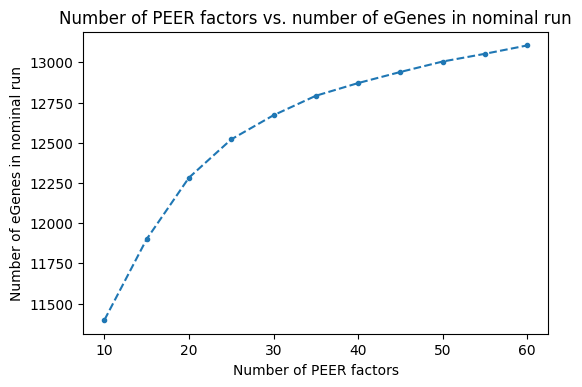

In [26]:
num_peers = [x for x in range(10, 61, 5)]
num_eGenes = [dict_total_eGenes[x] for x in num_peers] 
fig, ax = plt.subplots(dpi=100)
ax.plot(num_peers, num_eGenes, ls='--', marker='.')
ax.set_title('Number of PEER factors vs. number of eGenes in nominal run')
ax.set_xlabel('Number of PEER factors')
ax.set_ylabel('Number of eGenes in nominal run')

In [29]:
num_peers = [x for x in range(10, 61, 5)]
num_eGenes = [dict_total_eGenes[x] for x in num_peers] 
df_num_egenes = pd.DataFrame({'num_peers':num_peers, 'num_eGenes':num_eGenes})
display(df_num_egenes.head(2))
out_fn = '/data100t1/home/wanying/CCHC/eQTL_gtex_pipeline/output/nominal_runs/num_peer_vs_egenes.txt'
if not os.path.isfile(out_fn):
    df_num_egenes.to_csv(out_fn, sep='\t', index=False)

,num_peers,num_eGenes
0,10,11398
1,15,11901


# 2. Neew method (2024/04/07)
Do desired number of PEER factors on eQTL samples only

## 2.1 Check relevance of factors in different runs

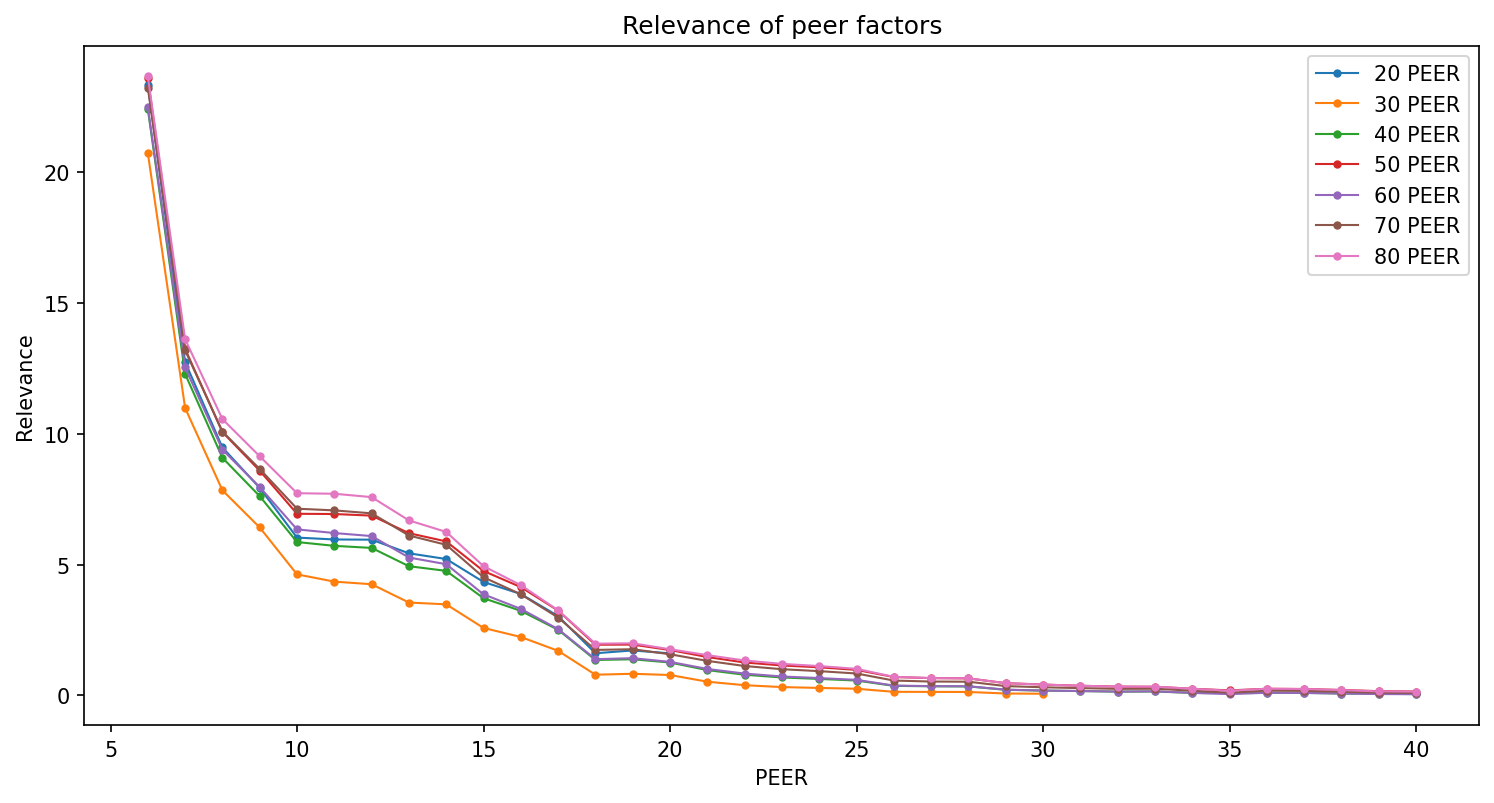

In [12]:
peer_path = '/vgipiper04/CCHC/RNAseq/batch1_2_3_4/GTEx/peer_factors/different_number_of_peers_for_eQTL'
# num_peers = [x for x in range(10, 61, 5)] + [70, 80]
num_peers = [20, 30, 40, 50, 60, 70, 80]
start_n_peer_to_plot, n_peer_to_plot = 5, 40

fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
for num_peer in num_peers:
    fn_alpha = f'CCHC_batch1_2_3_4.low_quality_dropped.eQTL_samples.no_adjustment.{num_peer}_peer.PEER_alpha.txt'
    df_alpha = pd.read_csv(f'{peer_path}/{fn_alpha}', sep='\t')
    label = f'{num_peer} PEER'
    ax.plot([i+1 for i in range(len(df_alpha))][start_n_peer_to_plot:n_peer_to_plot],
            df_alpha['Relevance'][start_n_peer_to_plot:n_peer_to_plot], ls='-', lw=1, marker='.', label=label)
ax.set_xlabel('PEER')
ax.set_ylabel('Relevance')
ax.set_title('Relevance of peer factors')
ax.legend()

## 2.2 Check number of eGenes vs. number of peer factors

In [11]:
# Path to results of nominal runs
pval_threshold = 1e-8
path = '/data100t1/home/wanying/CCHC/eQTL_gtex_pipeline/output/nominal_runs_redo_new_peer'
dict_total_eGenes = dict() # Track number of peer factors vs eGenes
num_peers = [x for x in range(10, 61, 5)] + [70, 80]
for num_peer in tqdm.tqdm(num_peers):
    total_eGenes = 0
    folder = f'nominal_{num_peer}_peer'
    for fn in tqdm.tqdm(os.listdir(f'{path}/{folder}')):
        if fn.endswith('txt.gz'):
            df = pd.read_csv(f'{path}/{folder}/{fn}', sep='\t', compression='gzip')
            mask = df['pval_nominal']<=pval_threshold
            total_eGenes += len(df[mask].drop_duplicates(subset='gene_id')) # Get number fof eGenes
    dict_total_eGenes[num_peer] = total_eGenes
            



  0%|                                                                                         | 0/13 [00:00<?, ?it/s]


  0%|                                                                                         | 0/44 [00:00<?, ?it/s]


  5%|███▋                                                                             | 2/44 [00:12<04:32,  6.50s/it]


 11%|█████████▏                                                                       | 5/44 [00:18<03:20,  5.14s/it]


 14%|███████████                                                                      | 6/44 [00:26<03:39,  5.78s/it]


 16%|████████████▉                                                                    | 7/44 [00:37<04:34,  7.42s/it]


 18%|██████████████▋                                                                  | 8/44 [00:48<05:09,  8.60s/it]


 20%|████████████████▌                                                                | 9/44 [00:58<05:11,  8.89s/it]


 23%|██████████████████▏              

Text(0, 0.5, 'Number of eGenes in nominal run')

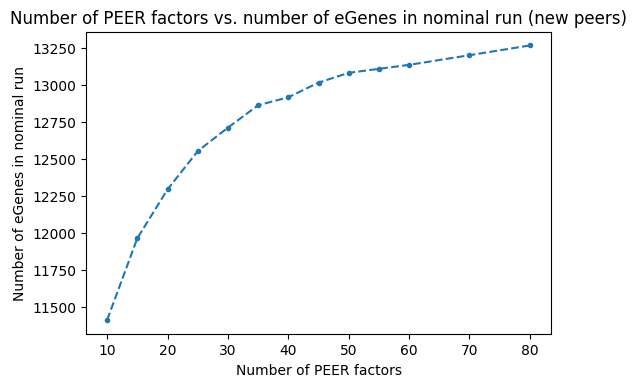

In [16]:
num_peers = [x for x in range(10, 61, 5)] + [70, 80]
num_eGenes = [dict_total_eGenes[x] for x in num_peers] 
fig, ax = plt.subplots(dpi=100)
ax.plot(num_peers, num_eGenes, ls='--', marker='.')
ax.set_title('Number of PEER factors vs. number of eGenes in nominal run (new peers)')
ax.set_xlabel('Number of PEER factors')
ax.set_ylabel('Number of eGenes in nominal run')

In [24]:
# Save results for future plotting and comparisons
num_peers = [x for x in range(10, 61, 5)] + [70, 80]
num_eGenes = [dict_total_eGenes[x] for x in num_peers] 
df_num_egenes_redo = pd.DataFrame({'num_peers_redo':num_peers, 'num_eGenes':num_eGenes})
display(df_num_egenes_redo.head(2))
out_fn = '/data100t1/home/wanying/CCHC/eQTL_gtex_pipeline/output/nominal_runs_redo_new_peer/num_peer_vs_egenes.txt'
if not os.path.isfile(out_fn):
    df_num_egenes_redo.to_csv(out_fn, sep='\t', index=False)

,num_peers_redo,num_eGenes
0,10,11411
1,15,11963


# 3. Plot and compare two methods

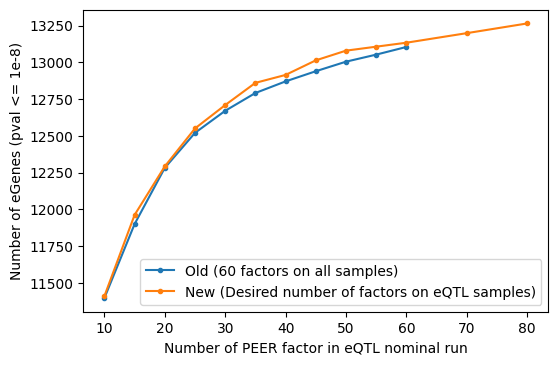

In [41]:
df_num_egenes
df_num_egenes_redo
fig, ax = plt.subplots(dpi=100)
ax.plot(df_num_egenes['num_peers'], df_num_egenes['num_eGenes'],
        ls='-', marker='.', label='Old (60 factors on all samples)')
ax.plot(df_num_egenes_redo['num_peers_redo'], df_num_egenes_redo['num_eGenes'],
        ls='-', marker='.', label='New (Desired number of factors on eQTL samples)')
ax.set_xlabel('Number of PEER factor in eQTL nominal run')
ax.set_ylabel('Number of eGenes (pval <= 1e-8)')
ax.legend()